___
# Hapiness
___

In [187]:
# import project dependencies

# processing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
from mpl_toolkits.mplot3d import Axes3D

import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables 
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

# mpl extras
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.style.use('seaborn-dark')


# math n statistic library
from scipy import stats

# to read matplotlib inline
%matplotlib inline

# for string operatoions
import re

In [126]:
# importing the datframe
df = pd.read_csv('happiness_score_dataset.csv')

In [127]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [128]:
# shape of the datframe
df.shape

(158, 12)

In [129]:
# The dataset consists of 158 rows and 12 columsn out of which the Happiness score column is the target variable
# This is a regession peoblem

In [130]:
# get the datatypes of each of the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [131]:
# description of the data
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [132]:
# check for the null values
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

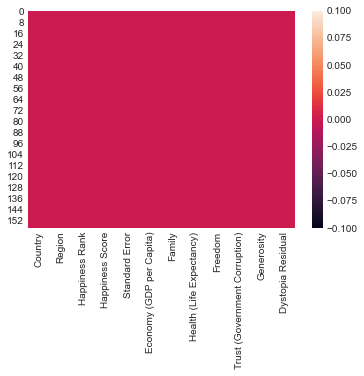

In [133]:
# there are no null values in the dataset.
sns.heatmap(df.isna())

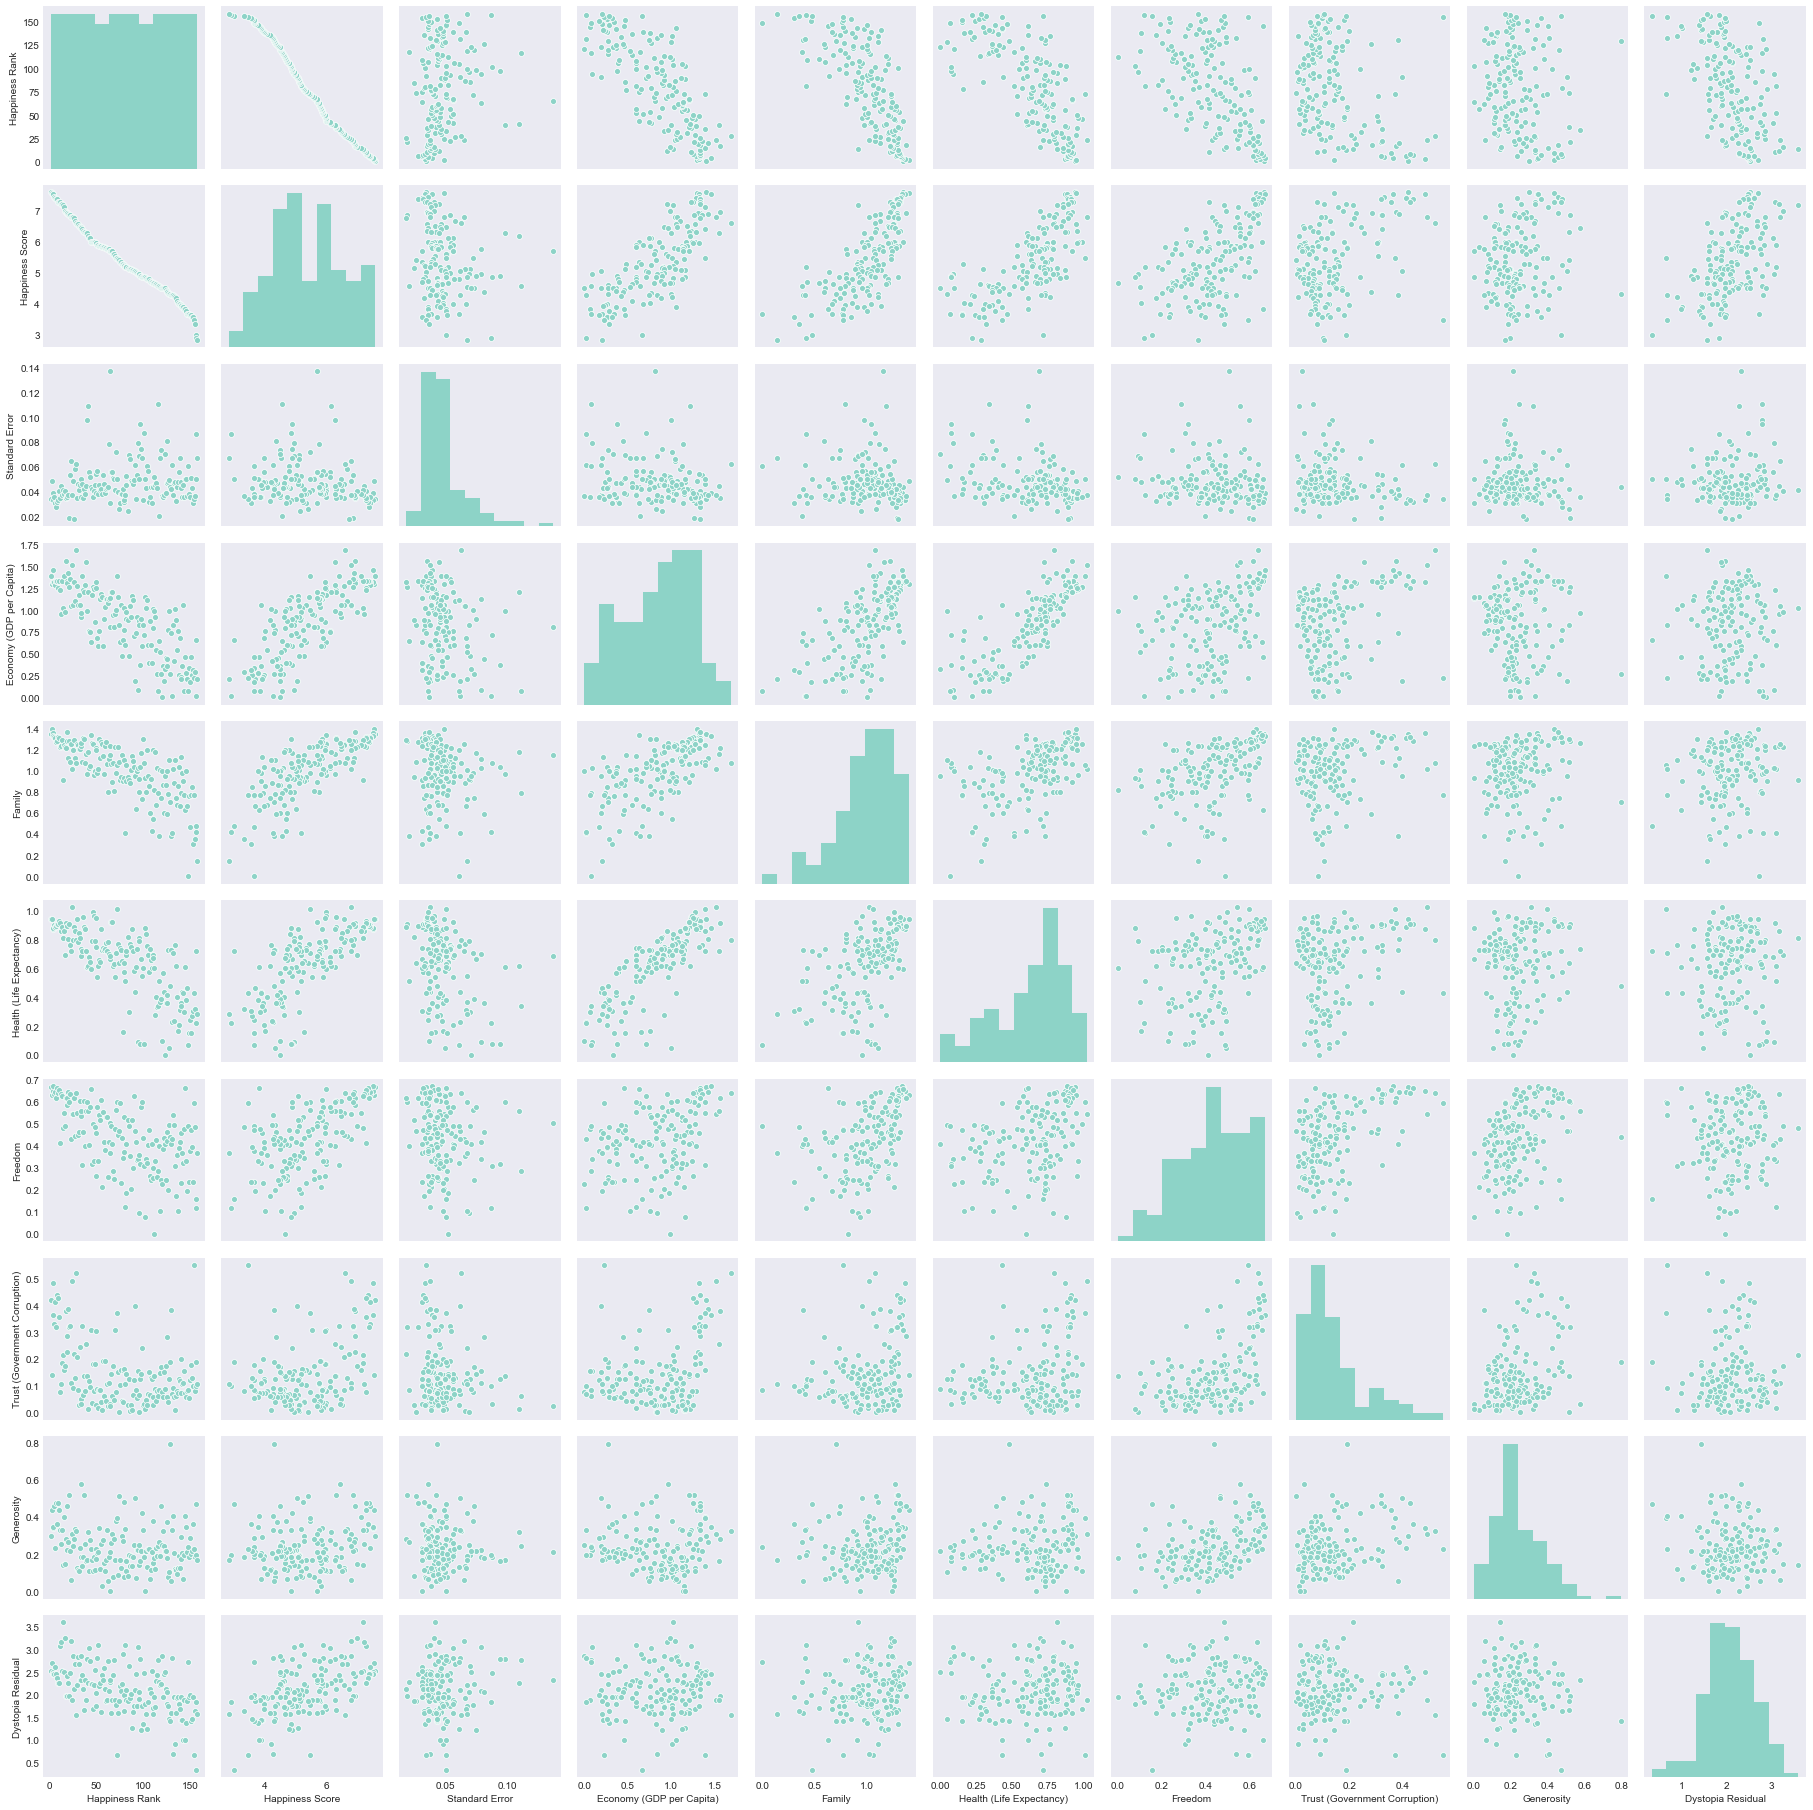

In [134]:
# pairplot of the dataset
sns.pairplot(df)

In [135]:
# get the numerical and categorical columns names in the seperate lists 
categorical_variables = _find_categorical_variables(df)
numerical_variables = _find_numerical_variables(df)

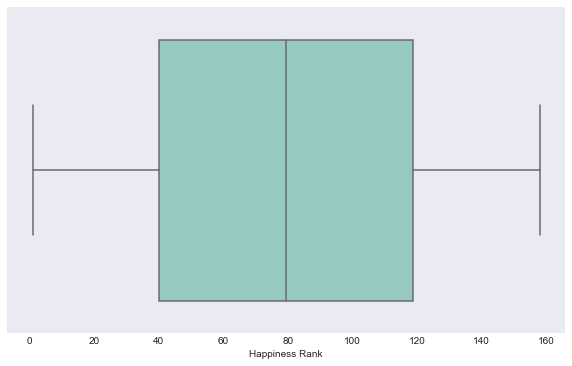

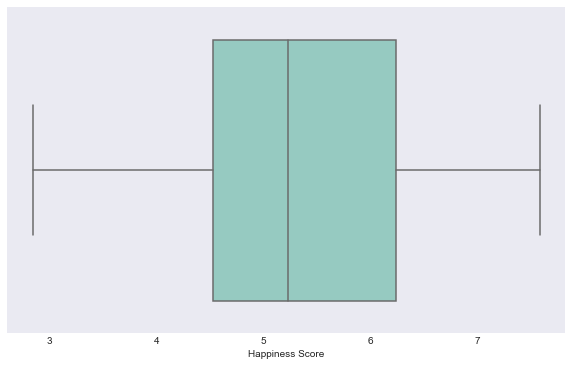

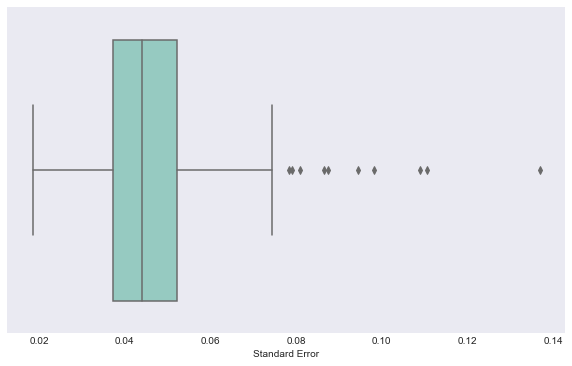

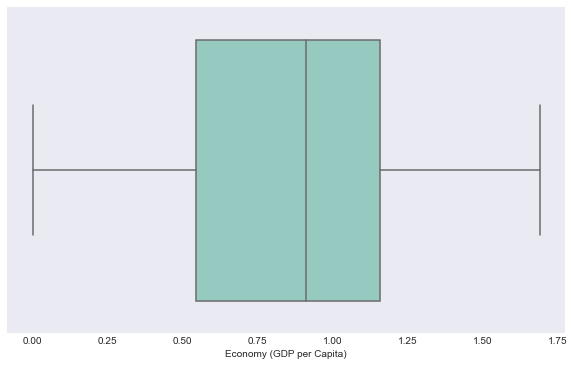

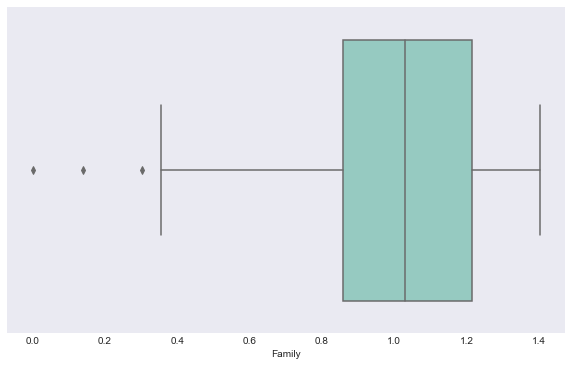

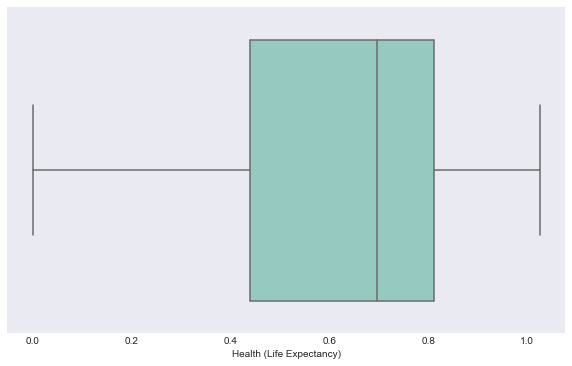

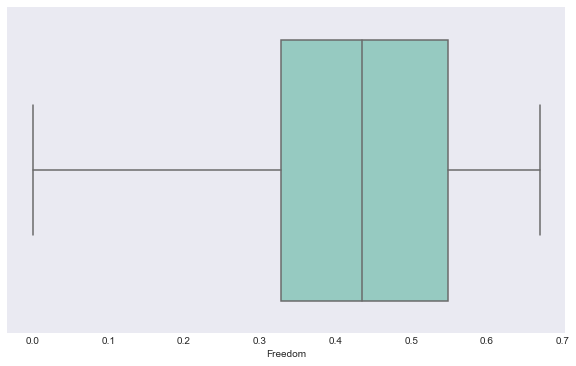

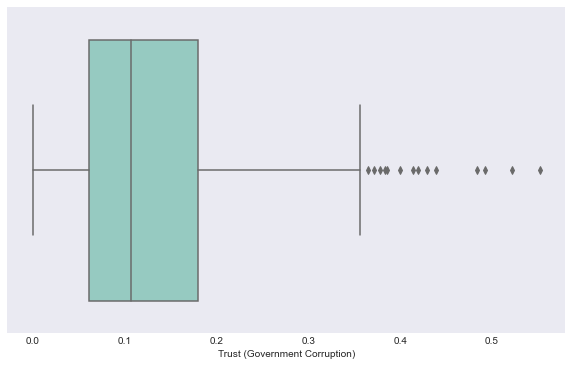

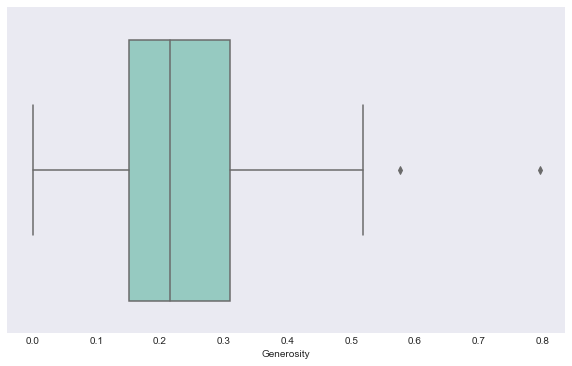

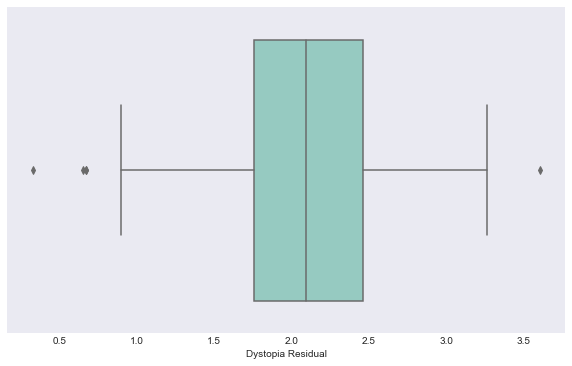

In [136]:
# Box plot of all the numerical features in the dataset
for col in numerical_variables:
    
    plt.figure(figsize=(10,6))
    sns.boxplot(df[col])

In [137]:
# 2 of the features have outliers accourding to the abouve boxlot

In [138]:
# we will use zscore to adress the outliers
zscores = stats.zscore(df[numerical_variables])

In [139]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_cleaned_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Happiness Rank                   78.500000
Happiness Score                   1.717750
Standard Error                    0.015032
Economy (GDP per Capita)          0.612640
Family                            0.357582
Health (Life Expectancy)          0.371828
Freedom                           0.220762
Trust (Government Corruption)     0.118580
Generosity                        0.159330
Dystopia Residual                 0.703005
dtype: float64


In [140]:
len(df)-len(df_cleaned_iqr)

32

In [141]:
# there are 9 outliers are are sucessfully removed

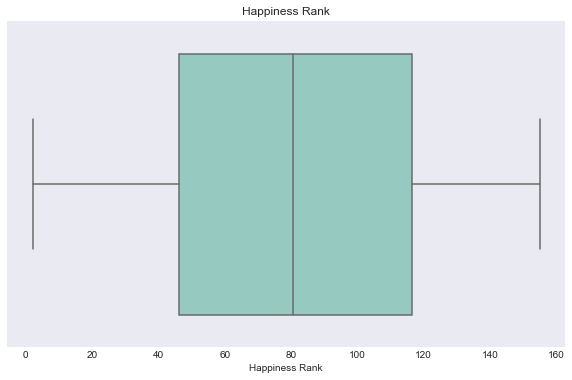

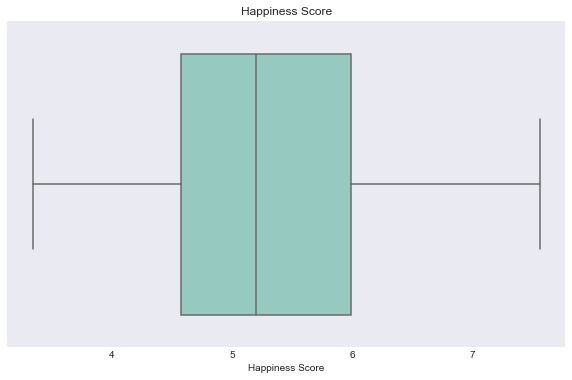

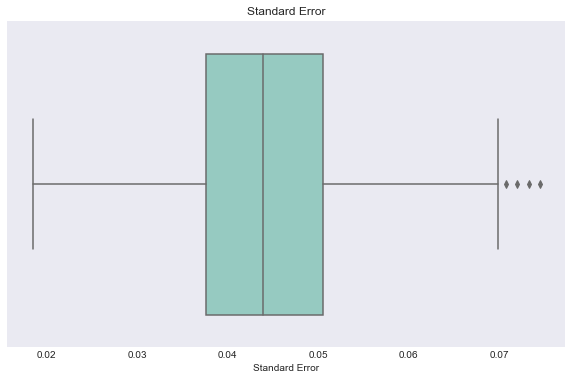

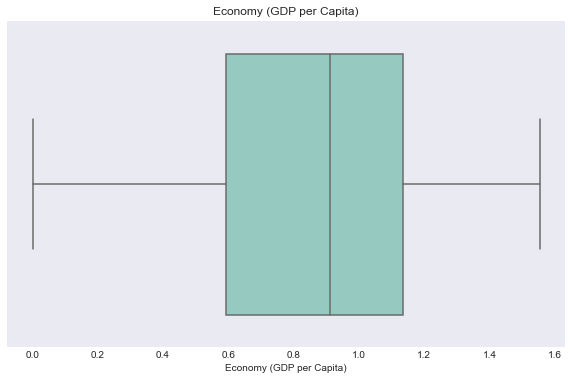

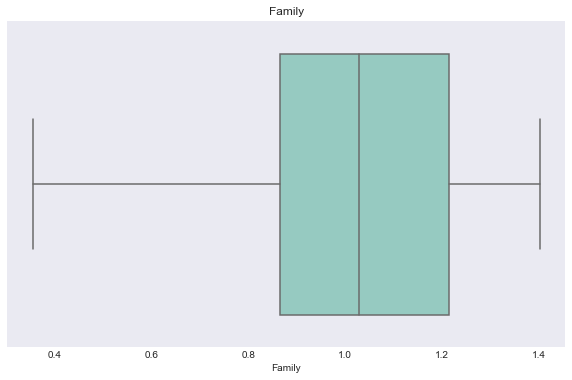

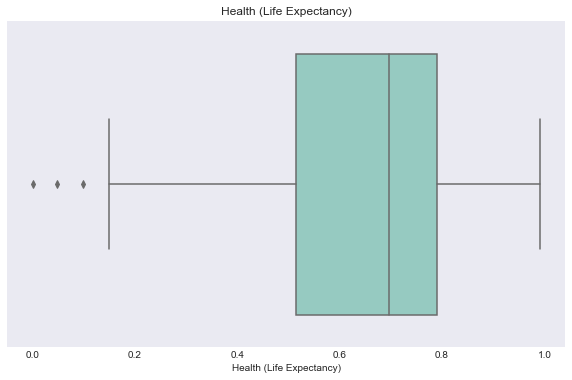

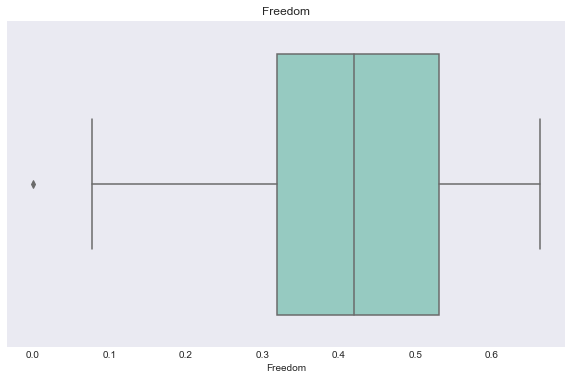

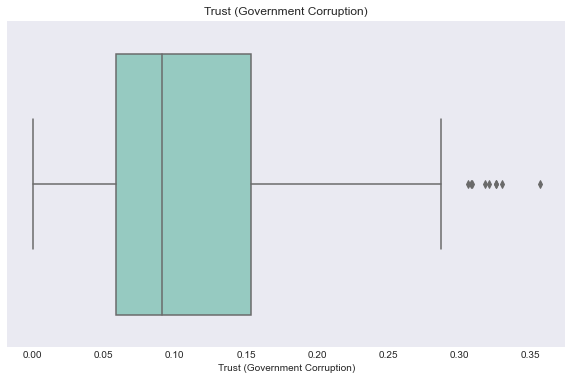

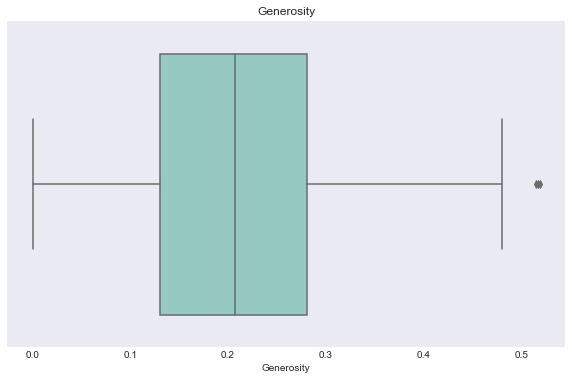

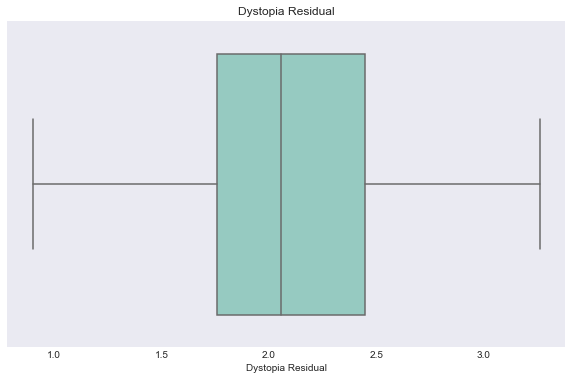

In [142]:
for col in numerical_variables:
    
    plt.figure(figsize=(10,6))
    plt.title(col)
    sns.boxplot(df_cleaned_iqr[col])

In [143]:
print(categorical_variables)
print(numerical_variables)

['Country', 'Region']
['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [144]:
# Now we have removed the outliers in the datset.
# let's check the skew of the dataset

In [145]:
df_cleaned_iqr.skew()

Happiness Rank                  -0.018211
Happiness Score                  0.217857
Standard Error                   0.478133
Economy (GDP per Capita)        -0.418441
Family                          -0.704866
Health (Life Expectancy)        -0.755316
Freedom                         -0.392531
Trust (Government Corruption)    1.082193
Generosity                       0.689359
Dystopia Residual                0.159596
dtype: float64

In [146]:
# There is only 1 feature which is extremely skewed, we should address that
df_cleaned_iqr_log_skew = np.log(df_cleaned_iqr[numerical_variables]+1)

In [147]:
df_cleaned_iqr.skew()

Happiness Rank                  -0.018211
Happiness Score                  0.217857
Standard Error                   0.478133
Economy (GDP per Capita)        -0.418441
Family                          -0.704866
Health (Life Expectancy)        -0.755316
Freedom                         -0.392531
Trust (Government Corruption)    1.082193
Generosity                       0.689359
Dystopia Residual                0.159596
dtype: float64

In [148]:
# We were encountering zero division error using log transformation ,let's try log+1 transformation.
# Log+1 transformation actually distorts the features more than before 

In [149]:
# let's try boxcox on the Trust feature
#stats.boxcox(df_cleaned_iqr['Trust (Government Corruption)'])
# Coz box is only not applicable as all the data is not positive

In [150]:
# lets look at trust feature

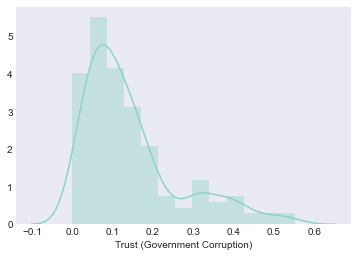

In [151]:
sns.distplot(df['Trust (Government Corruption)'])

In [152]:
q = df_cleaned_iqr['Trust (Government Corruption)'].quantile(0.99)

df_cleaned = df_cleaned_iqr[df['Trust (Government Corruption)']<q]

<ipython-input-152-51f4a58ce29c>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



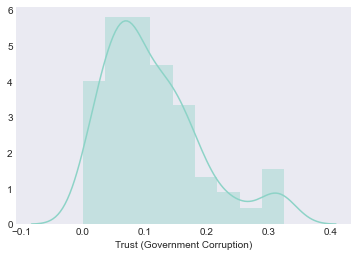

In [153]:
sns.distplot(df_cleaned['Trust (Government Corruption)'])

In [154]:
df_cleaned.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320


In [155]:
# EDA

In [156]:
### Country

In [157]:
# total countries in the dataset
len(df.Country.unique())

158

In [158]:
# there are in total 158 countries in the dataset.

In [159]:
## region
len(df.Region.unique())

10

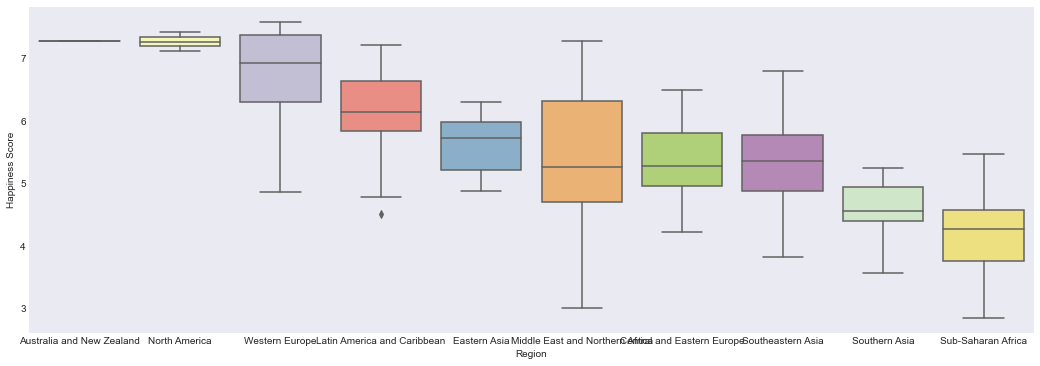

In [160]:
# let's get the avg happiness rank across thhere 10 regions
plt.figure(figsize=(18,6))
region_order_wrt_score = df.groupby('Region').agg({'Happiness Score':'mean'}).sort_values('Happiness Score',ascending=False).index
sns.boxplot(df.Region,df['Happiness Score'],order=region_order_wrt_score)

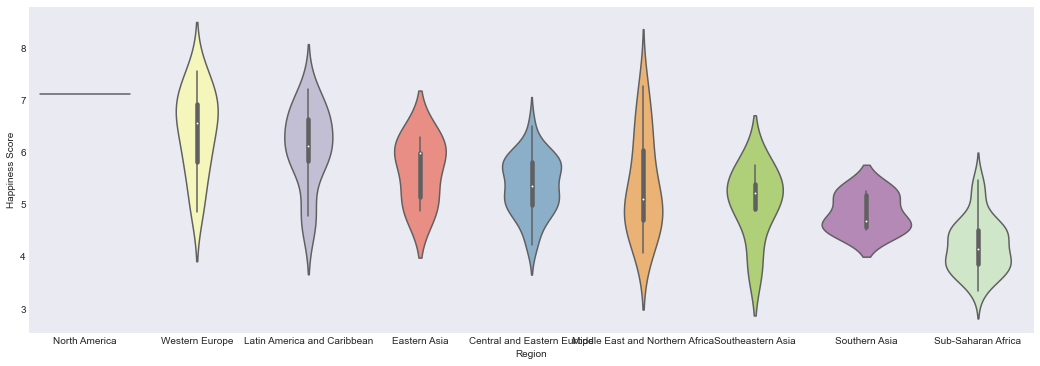

In [161]:
# This is plotting if the dataframe without outliers.
# The outlier region is Australia and Newzealand as shown in the above plot.

plt.figure(figsize=(18,6))
region_order_wrt_score = df_cleaned.groupby('Region').agg({'Happiness Score':'mean'}).sort_values('Happiness Score',ascending=False).index
sns.violinplot(df_cleaned.Region,df_cleaned['Happiness Score'],order=region_order_wrt_score)

In [162]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


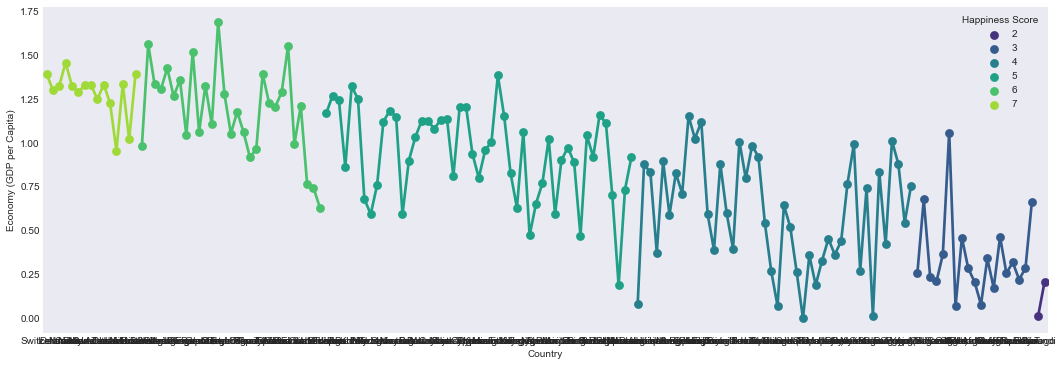

In [163]:
# how does the economy of the country affect of the hapiness score of the country?
plt.figure(figsize=(18,6))
sns.pointplot(df.Country,df['Economy (GDP per Capita)'],hue=df['Happiness Score'].astype('int'),palette='viridis')

In [164]:
# we can see that there is direct corealtion of the happiness score of the country woth its GDP..
# The more the GCP the happier the country is!

In [165]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


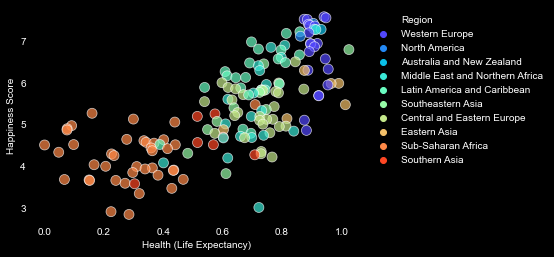

In [166]:
# is health related to you happiness ...let's find out!
plt.style.use('dark_background')
sns.scatterplot(df['Health (Life Expectancy)'],df['Happiness Score'],hue=df.Region,palette='rainbow',s=100,alpha=0.7)
plt.legend(bbox_to_anchor=(1,1))

In [167]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


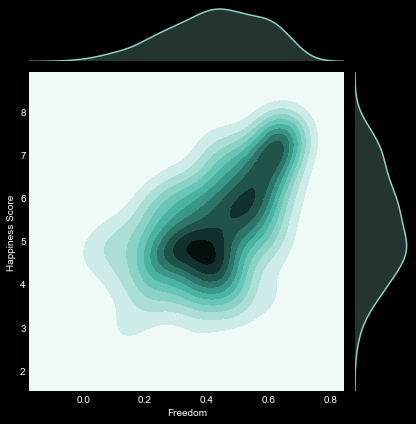

In [168]:
# freedom vs hapiness
sns.jointplot(df.Freedom,df['Happiness Score'],kind='kde')

In [169]:
# On an average the freedom of the counties in the world is centered around 0.4...which is a bad thing.
# Freedon is linearly related to the Happiness score of the country

In [170]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


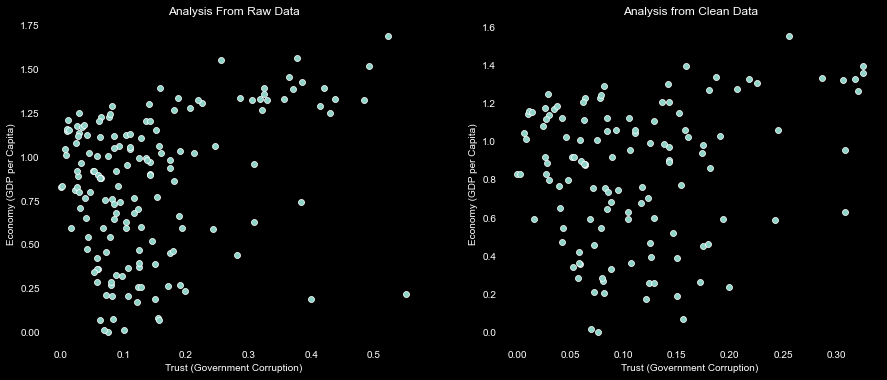

In [171]:
# What is the effect of the government curroption of the GDP of the nation..let's find out

fig = plt.figure(figsize=(15,6))

fig.add_subplot(121)
plt.title('Analysis From Raw Data')
sns.scatterplot(df['Trust (Government Corruption)'],df['Economy (GDP per Capita)'])

fig.add_subplot(122)
plt.title('Analysis from Clean Data')
sns.scatterplot(df_cleaned['Trust (Government Corruption)'],df['Economy (GDP per Capita)'])



In [172]:
# Fortunately there is no significate relation of Government Corruption with  the Economy of the country
# Au contrair...there's some datapoints showing that trust(gov corruption) actually benefits the Economy of the country! 

In [173]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [174]:
# let's get the correlation of the features with each other
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


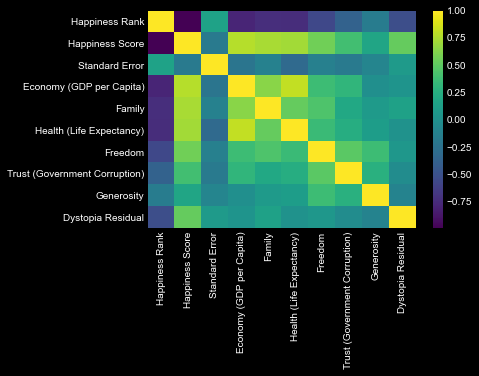

In [175]:
# get a heatmap
sns.heatmap(df.corr(),cmap='viridis')

In [176]:
# let's see the overall happines of every country.
px.bar(df,df.Country,df['Happiness Score'],color=df['Freedom'])

In [177]:
# The more the freedom the more you are happy

In [178]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [179]:
# Get the world happiness ranking of the world

data = [go.Choropleth(
               colorscale = 'blackbody',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z = df['Happiness Rank'],
               )]

layout = dict(title = 'Happiness Rank',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

fig = go.Figure(data = data ,layout = layout)
iplot(fig)

In [180]:
# let's get a look at generosity.

In [181]:
# the most generous 10 countries.
df.sort_values('Generosity',ascending=False)[:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
20,United Kingdom,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994
36,Malta,Western Europe,37,6.302,0.04206,1.20740,1.30203,0.88721,0.60365,0.13586,0.51752,1.64880
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [182]:
# Let's build a regression model for this data which would predict the Happiness score

In [183]:
# get the correalation of the features wrt to the traget variables
df_cleaned.corr()['Happiness Score']

Happiness Rank                  -0.993832
Happiness Score                  1.000000
Standard Error                  -0.142301
Economy (GDP per Capita)         0.744362
Family                           0.686464
Health (Life Expectancy)         0.729401
Freedom                          0.471353
Trust (Government Corruption)    0.340093
Generosity                       0.170226
Dystopia Residual                0.565825
Name: Happiness Score, dtype: float64

In [184]:
# happiness rand is highly negatively correalated with the Score ..because
# higher the score ...lower the rank

In [185]:
# We should drop the column as it's almost perfectly correalted to the target
df_cleaned.drop('Happiness Rank',1,inplace=False)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,Costa Rica,Latin America and Caribbean,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,Austria,Western Europe,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
...,...,...,...,...,...,...,...,...,...,...,...
148,Chad,Sub-Saharan Africa,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [190]:
# Labeling encoding on the categorical features
to_encode_cat = ['Country','Region']

encoder = OrdinalCategoricalEncoder(encoding_method='arbitrary',variables=to_encode_cat)

df_cleaned = encoder.fit_transform(df_cleaned)

In [191]:
df_cleaned.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,0,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
6,1,0,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
10,2,1,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,3,2,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,4,0,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320


In [362]:
# X and y split
X = df_cleaned.drop('Happiness Score',1)
y = df_cleaned['Happiness Score']

In [454]:
# check the shapes
X.shape,y.shape

((124, 11), (124,))

In [455]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

# check size 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((83, 11), (83,), (41, 11), (41,))

In [456]:
# standard scaling on the feautres
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(np.expand_dims(y_train,1))
y_test = sc.fit_transform(np.expand_dims(y_test,1))

In [457]:
# check size 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((83, 11), (83, 1), (41, 11), (41, 1))

In [458]:
# Importing the training dependencies
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR

In [459]:
# Import Tuning Dependencies
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [460]:
# Import the Evaluation Dependenies
from sklearn.metrics import r2_score,mean_squared_error

In [461]:
# let's try out some different model and find the best model:

In [462]:
def train_n_ret_r2score(model):
    """
    Input the model and get the r2 score in return.
    """
    model.fit(X_train,y_train.ravel())
    
    return r2_score(y_test,model.predict(X_test))

def train_n_mse(model):
    """
    Input the model and get the mse in return.
    """
    model.fit(X_train,y_train.ravel())
    
    return mse(y_test,model.predict(X_test))

def get_avg_cv_score(model):
    """
    Input the model and get the average cv score with scoring param:'r2' on the complete dataset with 10 Folds.
    """
    return np.mean(cross_val_score(model,X,y,cv=KFold(10,shuffle=True,random_state=42)))
    

In [463]:
# Simple linear Model:

train_n_ret_r2score(LinearRegression())

0.983852490727972

In [464]:
get_avg_cv_score(LinearRegression())

0.999999877966145

In [465]:
best_model = LinearRegression()
best_model.fit(X_train,y_train)
best_model.score(X_test,y_test)

# getting the pred values
best_y_preds = best_model.predict(X_test)

In [466]:
cross_val_score(best_model,X,y,cv=KFold(10,shuffle=True))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [467]:
np.mean(cross_val_score(best_model,X,y,cv=KFold(10,shuffle=True)))

0.9999998893022914

In [468]:
mean_squared_error(y_test,best_y_preds)

0.016147509272028

In [469]:
# Linear model is giving us the 96 percent on the r2 score..and moreover its giving a perfect CVscore on the 10 Fold Cross Validation data.

In [470]:
# get the coefficents of the Linear Regressioni Model
coeff_df = pd.DataFrame(model.coef_.T,index=df_cleaned.drop('Happiness Rank',1).columns)
coeff_df

,0
Country,0.001583
Region,-0.000037
Happiness Score,-0.002026
Standard Error,0.000029
Economy (GDP per Capita),0.367505
Family,0.247918
Health (Life Expectancy),0.236316
Freedom,0.141256
Trust (Government Corruption),0.077496
Generosity,0.114232


In [471]:
model.intercept_

array([6.046e-16])

In [472]:
# OLS regression results

In [473]:
res = sm.OLS(y,X).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.894e+09
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        22:33:38   Log-Likelihood:                          839.54
No. Observations:                 124   AIC:                                     -1657.
Df Residuals:                     113   BIC:                                     -1626.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [474]:
# comparing the true and the predicted results
list(zip(sc.inverse_transform(y_test.ravel()),sc.inverse_transform(best_y_preds.ravel())))

[(6.937, 7.140185894525294),
 (5.5889999999999995, 5.718000320071546),
 (5.791, 5.931058783933563),
 (6.295, 6.462749645107749),
 (5.192, 5.300419923302185),
 (4.507, 4.577821930431075),
 (5.399, 5.517545622761486),
 (4.633, 4.710819865738897),
 (6.94, 7.143137002154031),
 (3.9560000000000004, 3.9961961301722138),
 (6.853, 7.051225522890195),
 (5.013, 5.111314334616828),
 (4.512, 4.582985363589633),
 (5.689, 5.823556086736204),
 (4.686, 4.765758266583532),
 (7.278, 7.498891965311689),
 (4.436, 4.502240050700462),
 (4.715, 4.796767412075348),
 (6.3020000000000005, 6.4705771660166835),
 (5.7589999999999995, 5.897345172010983),
 (5.332000000000001, 5.448126512575389),
 (4.61, 4.685860942555978),
 (4.55, 4.623575779971225),
 (5.194, 5.301607994644826),
 (6.574, 6.75712614561086),
 (5.984, 6.134632063559827),
 (3.8960000000000004, 3.9338703626169815),
 (6.75, 6.942650075068436),
 (5.9479999999999995, 6.097218625761371),
 (4.885, 4.975757734491818),
 (6.122999999999999, 6.28122571779765),
 (

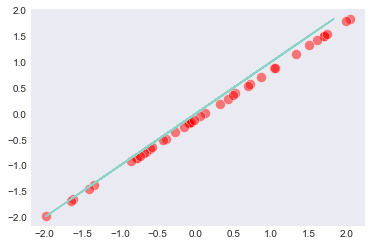

In [480]:
plt.plot(y_test,y_test)
#plt.plot(best_y_preds.ravel(),y_test.ravel(),color='r')
sns.scatterplot(best_y_preds.ravel(),y_test.ravel(),color='r',s=100,alpha=0.5)